# Soil Test Regression Task

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_excel('soil excel sheet - Copy.xlsx')

In [3]:
df.head()

,Project Name,Bore Hole No.,Depth from ground level(m),Breadth(m),N(Ave),Safe Bearing Pressure(kN/m^2),Allowable Bearing Pressure(kN/m^2),Type of soil,Differential Free Swell Index,Degree of Sensitivity
0,spt-14-2021-22,1.0,2.0,2.0,8.0,64.0,NaN,Reddish clay,NaN,NaN
1,NaN,NaN,3.0,2.0,27.0,333.0,NaN,Reddish Morum,NaN,NaN
2,spt-15-2021-22,1.0,2.0,2.0,13.0,127.0,NaN,Black and brownish clay,NaN,NaN
3,NaN,NaN,3.0,2.0,131.0,389.0,NaN,Brown and whitish gravel,NaN,NaN
4,NaN,2.0,2.0,2.0,14.0,140.0,NaN,Black and brownish clay,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Project Name                        47 non-null     object 
 1   Bore Hole No.                       66 non-null     float64
 2   Depth from ground level(m)          144 non-null    float64
 3   Breadth(m)                          144 non-null    float64
 4   N(Ave)                              144 non-null    float64
 5   Safe Bearing Pressure(kN/m^2)       127 non-null    float64
 6   Allowable Bearing Pressure(kN/m^2)  81 non-null     float64
 7   Type of soil                        136 non-null    object 
 8   Differential Free Swell Index       7 non-null      float64
 9   Degree of Sensitivity               7 non-null      object 
dtypes: float64(7), object(3)
memory usage: 12.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bore Hole No.,66.0,1.378788,0.548148,1.0,1.0,1.0,2.0,3.0
Depth from ground level(m),144.0,2.593750,1.727977,1.0,2.0,2.0,3.0,11.0
Breadth(m),144.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
N(Ave),144.0,30.861111,20.107269,7.0,18.0,27.0,39.0,131.0
Safe Bearing Pressure(kN/m^2),127.0,379.299213,275.618505,51.0,194.0,318.0,483.0,1347.0
Allowable Bearing Pressure(kN/m^2),81.0,328.604938,120.519882,135.0,208.0,340.0,400.0,598.0
Differential Free Swell Index,7.0,45.714286,7.867958,40.0,40.0,40.0,50.0,60.0


### Dropping the unwanted columns

In [6]:
df=df.drop(['Project Name','Bore Hole No.'],axis=1)

In [7]:
df.isna().sum()

Depth from ground level(m)             10
Breadth(m)                             10
N(Ave)                                 10
Safe Bearing Pressure(kN/m^2)          27
Allowable Bearing Pressure(kN/m^2)     73
Type of soil                           18
Differential Free Swell Index         147
Degree of Sensitivity                 147
dtype: int64

In [8]:
df=df.drop(['Differential Free Swell Index' , 'Degree of Sensitivity'],axis=1)

In [9]:
df.isna().sum()

Depth from ground level(m)            10
Breadth(m)                            10
N(Ave)                                10
Safe Bearing Pressure(kN/m^2)         27
Allowable Bearing Pressure(kN/m^2)    73
Type of soil                          18
dtype: int64

In [10]:
df = df.dropna(subset=['Type of soil'])

In [11]:
df.isna().sum()

Depth from ground level(m)             0
Breadth(m)                             2
N(Ave)                                 0
Safe Bearing Pressure(kN/m^2)         13
Allowable Bearing Pressure(kN/m^2)    59
Type of soil                           0
dtype: int64

In [12]:
df.head()

,Depth from ground level(m),Breadth(m),N(Ave),Safe Bearing Pressure(kN/m^2),Allowable Bearing Pressure(kN/m^2),Type of soil
0,2.0,2.0,8.0,64.0,NaN,Reddish clay
1,3.0,2.0,27.0,333.0,NaN,Reddish Morum
2,2.0,2.0,13.0,127.0,NaN,Black and brownish clay
3,3.0,2.0,131.0,389.0,NaN,Brown and whitish gravel
4,2.0,2.0,14.0,140.0,NaN,Black and brownish clay


### Imputaion

In [13]:
df['Breadth(m)'].fillna(int(df['Breadth(m)'].mean()), inplace=True)

In [14]:
df['Safe Bearing Pressure(kN/m^2)'].fillna(int(df['Safe Bearing Pressure(kN/m^2)'].mean()), inplace=True)

In [15]:
df['Allowable Bearing Pressure(kN/m^2)'].fillna(int(df['Allowable Bearing Pressure(kN/m^2)'].mean()), inplace=True)

In [16]:
df.isna().sum()

Depth from ground level(m)            0
Breadth(m)                            0
N(Ave)                                0
Safe Bearing Pressure(kN/m^2)         0
Allowable Bearing Pressure(kN/m^2)    0
Type of soil                          0
dtype: int64

## EDA

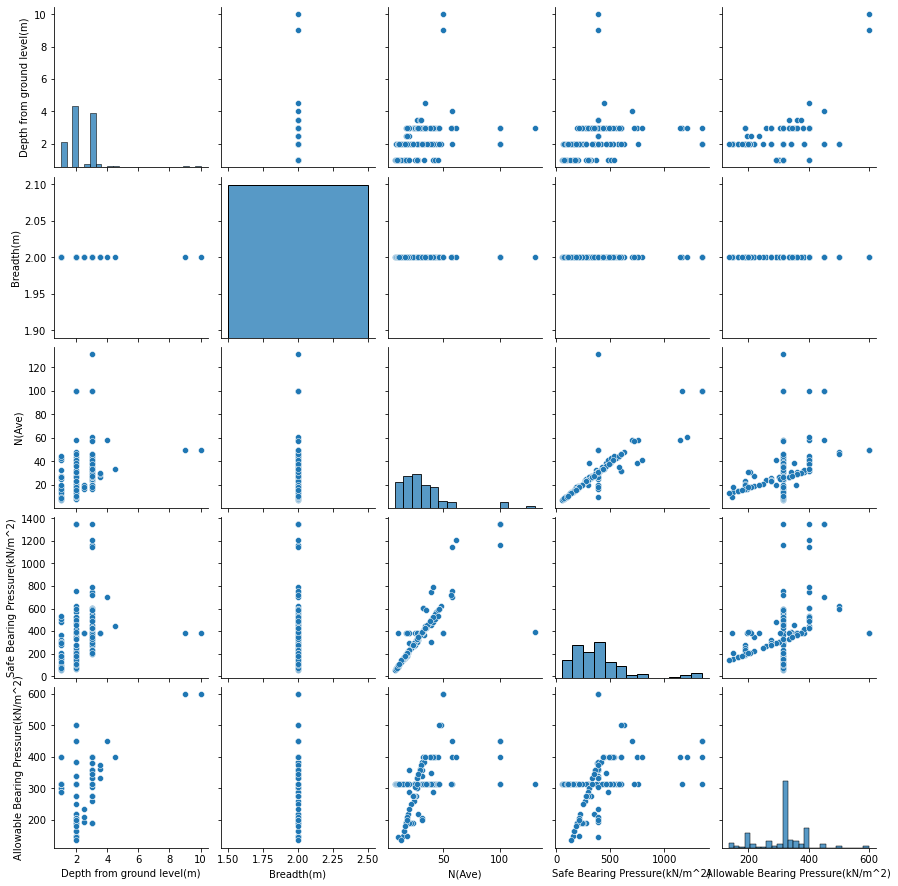

In [17]:
sns.pairplot(df)

<AxesSubplot:xlabel='Depth from ground level(m)', ylabel='Safe Bearing Pressure(kN/m^2)'>

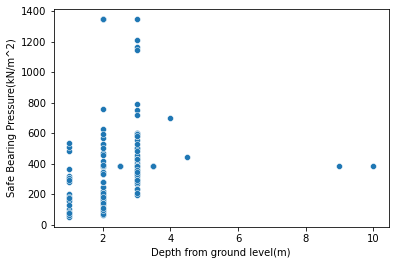

In [18]:
sns.scatterplot(x='Depth from ground level(m)',y='Safe Bearing Pressure(kN/m^2)',data=df)

<AxesSubplot:>

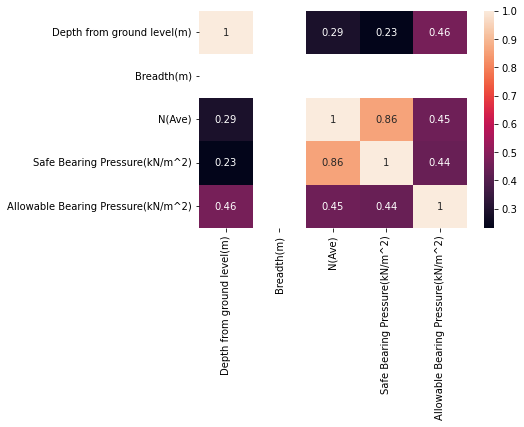

In [19]:
sns.heatmap(df.corr(),annot=True)

In [20]:
df=df.drop('Breadth(m)',axis=1)

In [21]:
df.head()

,Depth from ground level(m),N(Ave),Safe Bearing Pressure(kN/m^2),Allowable Bearing Pressure(kN/m^2),Type of soil
0,2.0,8.0,64.0,314.0,Reddish clay
1,3.0,27.0,333.0,314.0,Reddish Morum
2,2.0,13.0,127.0,314.0,Black and brownish clay
3,3.0,131.0,389.0,314.0,Brown and whitish gravel
4,2.0,14.0,140.0,314.0,Black and brownish clay


<AxesSubplot:>

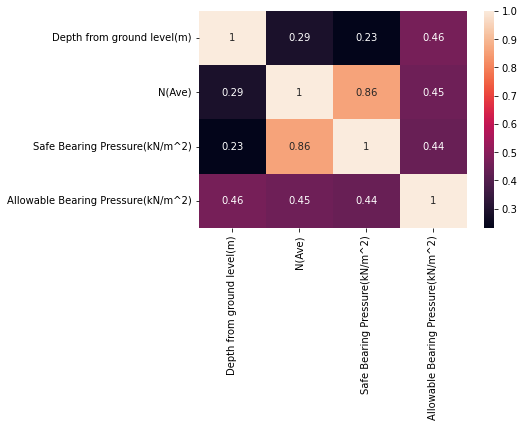

In [22]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

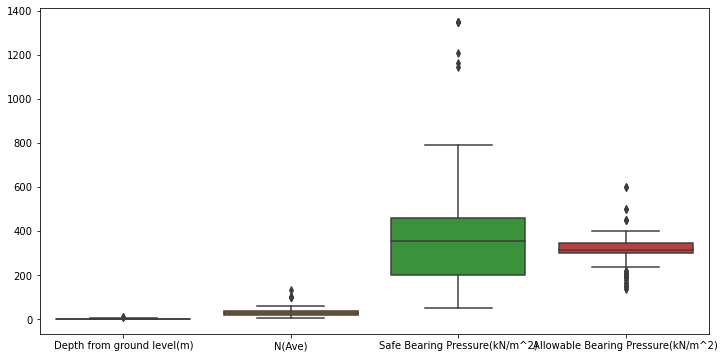

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 151
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Depth from ground level(m)          136 non-null    float64
 1   N(Ave)                              136 non-null    float64
 2   Safe Bearing Pressure(kN/m^2)       136 non-null    float64
 3   Allowable Bearing Pressure(kN/m^2)  136 non-null    float64
 4   Type of soil                        136 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.4+ KB


C:\Users\SUDU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\SUDU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


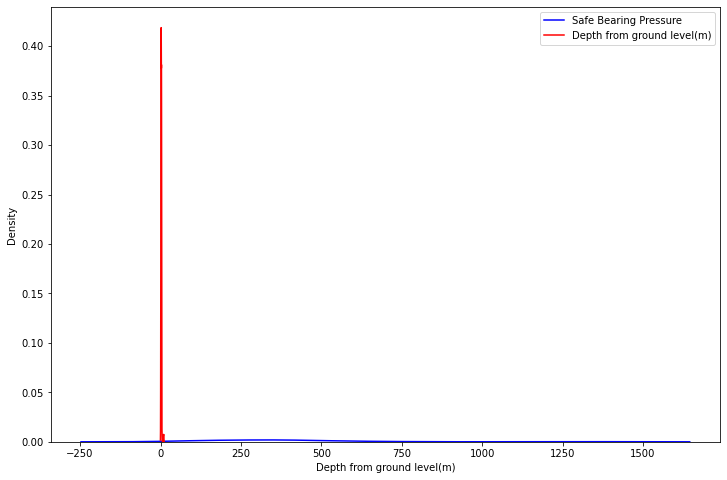

In [25]:
plt.figure(figsize=(12,8))
sns.distplot(df['Safe Bearing Pressure(kN/m^2)'],color='blue',hist=False,label='Safe Bearing Pressure')
sns.distplot(df['Depth from ground level(m)'],color='red',hist=False,label='Depth from ground level(m)')
plt.legend()
plt.show()

C:\Users\SUDU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\SUDU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


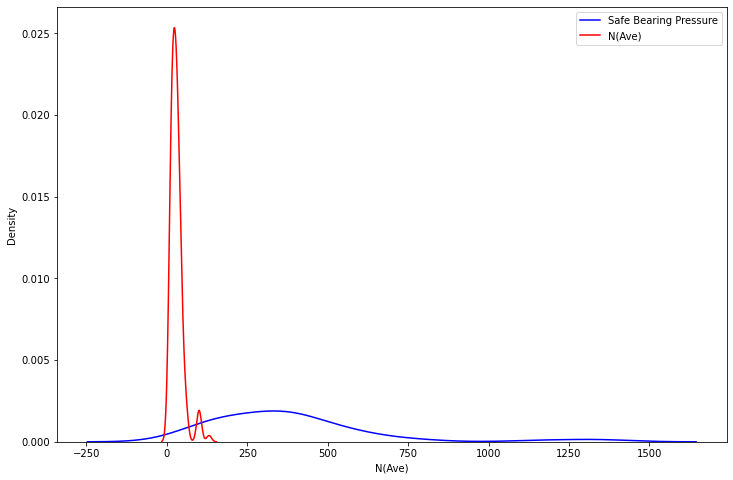

In [26]:
plt.figure(figsize=(12,8))
sns.distplot(df['Safe Bearing Pressure(kN/m^2)'],color='blue',hist=False,label='Safe Bearing Pressure')
sns.distplot(df['N(Ave)'],color='red',hist=False,label='N(Ave)')
plt.legend()
plt.show()

C:\Users\SUDU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\SUDU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


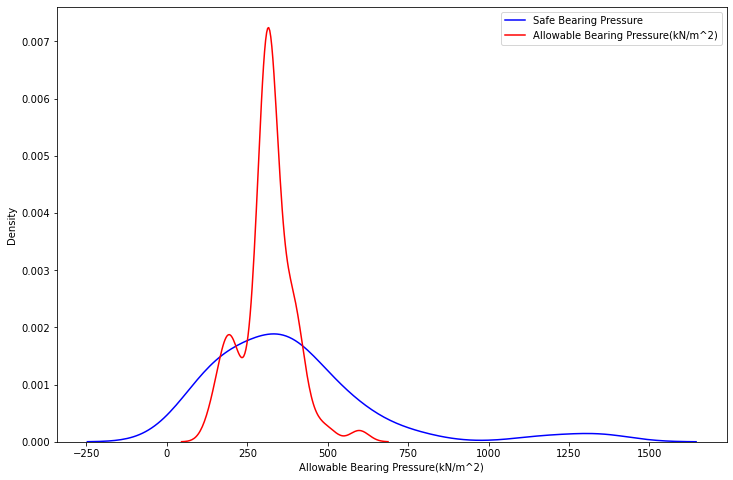

In [27]:
plt.figure(figsize=(12,8))
sns.distplot(df['Safe Bearing Pressure(kN/m^2)'],color='blue',hist=False,label='Safe Bearing Pressure')
sns.distplot(df['Allowable Bearing Pressure(kN/m^2)'],color='red',hist=False,label='Allowable Bearing Pressure(kN/m^2)')
plt.legend()
plt.show()

In [28]:
df['Type of soil'].nunique()

38

In [29]:
df= pd.get_dummies(df, columns=['Type of soil'],drop_first=True)

In [30]:
df.shape

(136, 41)

In [31]:
#from scipy import stats

In [32]:
#df_new=df[(np.abs(stats.zscore(df))<3).all(axis=1)]

In [33]:
#df_new.info()

## Important Feature Selection

In [34]:
X= df.drop('Safe Bearing Pressure(kN/m^2)',axis=1)
y= df['Safe Bearing Pressure(kN/m^2)']

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
Er= ExtraTreesRegressor()

In [36]:
Er.fit(X,y)

ExtraTreesRegressor()

In [37]:
S= pd.Series(Er.feature_importances_,index=X.columns)

In [38]:
S.nlargest()

N(Ave)                                   0.747683
Allowable Bearing Pressure(kN/m^2)       0.063640
Type of soil_Brownish moorum             0.046325
Type of soil_Brown and whitish gravel    0.038845
Depth from ground level(m)               0.037077
dtype: float64

In [39]:
from sklearn.feature_selection import mutual_info_regression

Mu= mutual_info_regression(X,y)

In [40]:
S1= pd.Series(Mu,index=X.columns)
S1.nlargest()

N(Ave)                                    2.048966
Allowable Bearing Pressure(kN/m^2)        0.610984
Depth from ground level(m)                0.206070
Type of soil_Brown clay with gravel       0.102463
Type of soil_Brownish clay with gravel    0.071559
dtype: float64

## Train and Test Data

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
Sc= StandardScaler()

In [44]:
X_train = Sc.fit_transform(X_train)
X_test = Sc.transform(X_test)

# Creating a Model

## Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
M1= LinearRegression()

In [47]:
M1.fit(X_train,y_train)

LinearRegression()

In [48]:
P1= M1.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error,mean_absolute_error,r2_score
print(mean_absolute_error(y_test,P1))
print(mean_squared_error(y_test,P1))
print(r2_score(y_test,P1))

79.68699568162295
22306.145953093637
0.7947102321519216


## Linear Regression digree 2

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [51]:
M2 = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

In [52]:
M2.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [53]:
P2=M2.predict(X_test)

In [54]:
print(mean_absolute_error(y_test,P2))
print(mean_squared_error(y_test,P2))
print(r2_score(y_test,P2))

583333766707.1628
6.326118283586038e+24
-5.822105515438658e+19


## Linear Regression digree 3

In [55]:
M3 = make_pipeline(PolynomialFeatures(degree=3),LinearRegression())
M3.fit(X_train,y_train)
P3=M3.predict(X_test)

print(mean_absolute_error(y_test,P3))
print(mean_squared_error(y_test,P3))
print(r2_score(y_test,P3))

26298747650.82947
7.030717910184017e+21
-6.470568473021345e+16


## Ridge Regression


Linear least squares with l2 regularization.

In [56]:
from sklearn.linear_model import Ridge

In [57]:
M4 = Ridge()

In [58]:
M4.fit(X_train,y_train)

Ridge()

In [59]:
P4= M4.predict(X_test)

In [60]:
print(np.sqrt(mean_squared_log_error(y_test,P4)))
print(mean_absolute_error(y_test,P4))
print(mean_squared_error(y_test,P4))
print(r2_score(y_test,P4))

0.21070494446595867
80.98440572027206
22828.420301217186
0.7899035936629262


## Ridge Regression digree 2

In [61]:
M5 = make_pipeline(PolynomialFeatures(degree=2),Ridge())

In [62]:
M5.fit(X_train,y_train)
P5= M5.predict(X_test)

In [63]:
print(np.sqrt(mean_squared_log_error(y_test,P5)))
print(mean_absolute_error(y_test,P5))
print(mean_squared_error(y_test,P5))
print(r2_score(y_test,P5))

0.45413444726470464
138.50757321699885
59985.95117974281
0.4479323313973176


## Ridge Regression digree 2

In [64]:
M6 = make_pipeline(PolynomialFeatures(degree=3),Ridge())
M6.fit(X_train,y_train)
P6= M6.predict(X_test)

print(mean_absolute_error(y_test,P6))
print(mean_squared_error(y_test,P6))
print(r2_score(y_test,P6))

153.88662633923565
84561.03383453214
0.2217608975845058


## Lasso


The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. 

In [65]:
from sklearn.linear_model import Lasso

In [66]:
M7 = Lasso()

In [67]:
M7.fit(X_train,y_train)

Lasso()

In [68]:
P7 = M7.predict(X_test)

In [69]:
print(mean_absolute_error(y_test,P7))
print(mean_squared_error(y_test,P7))
print(r2_score(y_test,P7))

79.19675405788793
21906.78089832557
0.7983857016638838


## Lasso 2

In [70]:
M8 = make_pipeline(PolynomialFeatures(degree=2),Lasso())
M8.fit(X_train,y_train)
P8= M8.predict(X_test)

print(mean_absolute_error(y_test,P8))
print(mean_squared_error(y_test,P8))
print(r2_score(y_test,P8))

64.16369353622319
14433.259744458104
0.8671666298399755


## Lasso 3

In [71]:
M9 = make_pipeline(PolynomialFeatures(degree=3),Lasso())
M9.fit(X_train,y_train)
P9= M9.predict(X_test)

print(mean_absolute_error(y_test,P9))
print(mean_squared_error(y_test,P9))
print(r2_score(y_test,P9))

143.01700307278549
70479.9192201869
0.35135337654971244


C:\Users\SUDU\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.833e+04, tolerance: 6.452e+02
  model = cd_fast.enet_coordinate_descent(


## SGD Regressor
### Stochastic Gradient Descent

In [72]:
from sklearn.linear_model import SGDRegressor

In [73]:
M10 = SGDRegressor(max_iter=2000, tol=1e-3)

In [74]:
M10.fit(X_train,y_train)

SGDRegressor(max_iter=2000)

In [75]:
P10= M10.predict(X_test)

In [76]:
print(mean_absolute_error(y_test,P10))
print(mean_squared_error(y_test,P10))
print(r2_score(y_test,P10))

82.46750695367608
22767.758202386245
0.7904618841095308


## Decision Tree Regressor

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
M11 = DecisionTreeRegressor()
M11.fit(X_train,y_train)
P11 = M11.predict(X_test)

print(mean_absolute_error(y_test,P11))
print(mean_squared_error(y_test,P11))
print(np.sqrt(mean_squared_error(y_test,P11)))
print(r2_score(y_test,P11))

62.92857142857143
20201.071428571428
142.1304732580998
0.8140838281711897


## Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
M12 = RandomForestRegressor()

M12.fit(X_train,y_train)
P12= M12.predict(X_test)

print(mean_absolute_error(y_test,P12))
print(mean_squared_error(y_test,P12))
print(np.sqrt(mean_squared_error(y_test,P12)))
print(r2_score(y_test,P12))

68.91821428571428
18200.248075000003
134.90829505630853
0.8324979711891468


## AdaBoost Regressor

In [80]:
from sklearn.ensemble import AdaBoostRegressor
M13 =AdaBoostRegressor()

M13.fit(X_train,y_train)
P13 =M13.predict(X_test)

print(mean_absolute_error(y_test,P13))
print(mean_squared_error(y_test,P13))
print(np.sqrt(mean_squared_error(y_test,P13)))
print(r2_score(y_test,P13))

92.09397816726984
26712.635897255892
163.44000702782625
0.7541560593439336


## Gradient Boosting Regressor

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
M14 = GradientBoostingRegressor()

M14.fit(X_train,y_train)
P14 = M14.predict(X_test)

print(mean_absolute_error(y_test,P14))
print(mean_squared_error(y_test,P14))
print(np.sqrt(mean_squared_error(y_test,P14)))
print(r2_score(y_test,P14))

61.870463650736205
17093.286777592
130.7412971390142
0.8426856489816066


## KNN Regressor

In [85]:
from sklearn.neighbors import KNeighborsRegressor
M15 = KNeighborsRegressor(n_neighbors=2)

M15.fit(X_train,y_train)

P15= M15.predict(X_test)

print(mean_absolute_error(y_test,P15))
print(mean_squared_error(y_test,P15))
print(np.sqrt(mean_squared_error(y_test,P15)))
print(r2_score(y_test,P15))

209.85714285714286
86402.39285714286
293.9428394384576
0.20481434988990987


Text(0, 0.5, 'Error Rate')

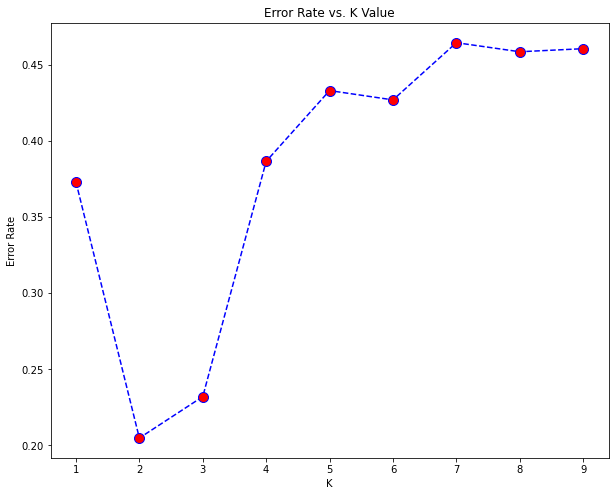

In [86]:
error_Mat=[]
for i in range (1,10):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(r2_score(y_test,predict_i))

plt.figure(figsize=(10,8))
plt.plot(range(1,10),error_Mat,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [87]:
from sklearn.neighbors import KNeighborsRegressor
M15 = KNeighborsRegressor(n_neighbors=7)

M15.fit(X_train,y_train)

P15= M15.predict(X_test)

print(mean_absolute_error(y_test,P15))
print(mean_squared_error(y_test,P15))
print(np.sqrt(mean_squared_error(y_test,P15)))
print(r2_score(y_test,P15))

155.87244897959184
58188.32580174927
241.222564868524
0.464476385995639


## Support Vector Machine

In [88]:
from sklearn.svm import SVR
M16= SVR()

M16.fit(X_train,y_train)

P16= M16.predict(X_test)

print(mean_absolute_error(y_test,P16))
print(mean_squared_error(y_test,P16))
print(np.sqrt(mean_squared_error(y_test,P16)))
print(r2_score(y_test,P16))

220.49267268721226
110527.97837936156
332.4574835664879
-0.01722023472502432


In [90]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100, 1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 

M17=GridSearchCV(SVR(),param_grid)

M17.fit(X_train,y_train)

P17=M17.predict(X_test)

print(np.sqrt(mean_squared_log_error(y_test,P17)))
print(mean_absolute_error(y_test,P17))
print(mean_squared_error(y_test,P17))
print(r2_score(y_test,P17))

0.25811244386145
88.24141197194986
31976.3651572289
0.7057124707443025


## Neural Network Regression 

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [92]:
M18 = Sequential()

M18.add(Dense(units=9,activation='relu'))
#M18.add(Dropout(0.5))
# best values is b/w 0.2 to 0.5


M18.add(Dense(units=5,activation='relu'))
#M18.add(Dropout(0.5))

M18.add(Dense(units=1,activation='relu'))

M18.compile(optimizer='adam',loss='mse')

In [93]:
erly = EarlyStopping(monitor='val_loss',mode='min',verbose=0,patience=25)

In [94]:
M18.fit(x=X_train,y=y_train,epochs=600,verbose=0,validation_data=(X_test,y_test),callbacks=[erly])

In [95]:
loss =pd.DataFrame(M18.history.history)

<AxesSubplot:>

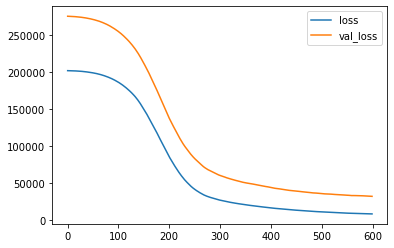

In [96]:
loss.plot()

In [97]:
P18=M18.predict(X_test)

print(np.sqrt(mean_squared_log_error(y_test,P18)))
print(mean_absolute_error(y_test,P18))
print(mean_squared_error(y_test,P18))
print(r2_score(y_test,P18))

0.4925916132401991
115.24633543831962
31589.957630586636
0.7092686884614263


## Hyper parameter tuning

In [98]:
param_grid = {
    'criterion': ['mse', 'mae', 'friedman_mse'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3, 4, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

In [100]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
from sklearn.model_selection import RandomizedSearchCV


rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=True, cv = 10, n_iter=5)
rs.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae',
                                                      'friedman_mse'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['sqrt', None],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450],
                                        'subsample': [0.8, 0.9, 1.0]},
                   return_train_score=True, verbose=True)

In [103]:
P19= rs.predict(X_test)
print(np.sqrt(mean_squared_log_error(y_test,P19)))
print(mean_absolute_error(y_test,P19))
print(mean_squared_error(y_test,P19))
print(r2_score(y_test,P19))

0.19944808885372284
67.08667493084829
18496.355008644332
0.8297728153601714


In [104]:
rs.best_params_

{'subsample': 0.8,
 'n_estimators': 50,
 'max_leaf_nodes': 5,
 'max_features': None,
 'max_depth': 4,
 'learning_rate': 0.15,
 'criterion': 'mae'}

In [105]:
grid_2 = {'subsample': [0.7,0.8,0.9],
 'n_estimators': [25,50,75],
 'max_leaf_nodes': [4,5,6],
 'max_features': ['sqrt'],
 'max_depth': [3,4,5],
 'learning_rate': [0.1,0.15,0.2],
 'criterion': ['mse']}

M19 = GridSearchCV(estimator=GradientBoostingRegressor(),
                          param_grid = grid_2,
                          cv=5,
                          verbose=True)

In [106]:
M19.fit(X_train,y_train)
P20= M19.predict(X_test)

print(np.sqrt(mean_squared_log_error(y_test,P20)))
print(mean_absolute_error(y_test,P20))
print(mean_squared_error(y_test,P20))
print(r2_score(y_test,P20))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
0.23988620492019982
66.36542885122104
13881.48003643168
0.8722448144982408


In [108]:
Name=['Linear Regression','Linear Regression digree 2','Linear Regression digree 3','Ridge Regression',
      'Ridge Regression digree 2','Ridge Regression digree 3','Lasso','Lasso digree 2','Lasso digree 3','SGDRegressor',
     'Decision Tree Regressor','Random Forest Regressor','AdaBoost Regressor','Gradient Boosting Regressor','KNN Regressor',
      'Support Vector Machine','Neural Network Regression','Gradient Boosting Regresso(HPT)']
clfs= [M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M18,M19]

In [109]:
results=[]
for i in clfs:
    i.fit(X_train,y_train)
    r2=r2_score(y_test, i.predict(X_test))
    results.append(r2)

4/4 [==============================] - 0s 3ms/step - loss: 7811.9966
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [110]:
score= pd.DataFrame(results,index=Name)
score.columns=['R2']
score.sort_values(by='R2',ascending=False)

,R2
Lasso digree 2,8.671666e-01
Gradient Boosting Regresso(HPT),8.615883e-01
Gradient Boosting Regressor,8.435973e-01
Decision Tree Regressor,8.288393e-01
Random Forest Regressor,8.245216e-01
Lasso,7.983857e-01
Linear Regression,7.947102e-01
SGDRegressor,7.924472e-01
Ridge Regression,7.899036e-01
AdaBoost Regressor,7.402662e-01


In [122]:
df.shape

(136, 41)

In [129]:
feature_imp = pd.DataFrame(M14.feature_importances_ ,index=df.columns[0:40])[:5]
feature_imp.sort_values(by=0,ascending=False)

,0
N(Ave),0.881196
Safe Bearing Pressure(kN/m^2),0.022591
Depth from ground level(m),0.011005
Allowable Bearing Pressure(kN/m^2),0.000000
Type of soil_ Black clay with moorum,0.000000


<AxesSubplot:>

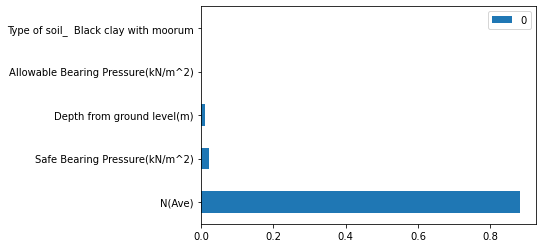

In [130]:
feature_imp.sort_values(by=0,ascending=False).plot(kind='barh')

In [131]:
print(X_test[:1])
print(y_test[:1])

[[-0.38029279  3.3856331   1.8026923  -0.09667365 -0.09667365 -0.09667365
  -0.09667365 -0.16903085 -0.09667365 -0.09667365 -0.09667365 -0.13736056
  -0.09667365 -0.24253563 -0.16903085 -0.09667365 -0.13736056  5.91607978
  -0.13736056 -0.16903085 -0.41702883 -0.16903085 -0.38592249 -0.30151134
  -0.13736056 -0.22032632 -0.09667365 -0.13736056 -0.13736056 -0.09667365
  -0.09667365 -0.24253563 -0.24253563  0.         -0.09667365 -0.09667365
  -0.09667365 -0.09667365  0.         -0.13736056]]
78    1347.0
Name: Safe Bearing Pressure(kN/m^2), dtype: float64


In [133]:
accuracy=r2_score(y_test,P8)
accuracy

0.8671666298399755

In [134]:
predicted_strength=M8.predict(X_test[:1])

strength_at_max_accuracy=(predicted_strength*(accuracy))
strength_range= strength_at_max_accuracy-predicted_strength

min_strength=predicted_strength+strength_range
max_strength=predicted_strength-strength_range

print(max_strength,min_strength)

[1522.67773427] [1165.58653191]
